In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# Single label

In [2]:
def get_images_per_dataset(df,thres = 10):

  #get unique datasets
  df['dataset'] = df['ID'].apply(lambda x: x.split('/')[1])
  unique_datasets = df.dataset.unique()
  print('total number of datasets:', len(unique_datasets))

  #get count of images for each dataset
  dataset_list = []
  count_list = []
  for dataset in unique_datasets:
    dataset_list.append(dataset)
    count_list.append(df.loc[df['dataset'] == dataset].shape[0])

  #sort in descending order
  sort_index = np.argsort(-1.0*np.array(count_list))
  ordered_count_list = [count_list[idx] for idx in sort_index]
  ordered_dataset_list = [dataset_list[idx] for idx in sort_index]

  #filter datasets with count above the predefined threshold
  filtered_datasets = []
  filtered_counts = []
  for dataset, count in zip(ordered_dataset_list,ordered_count_list):
    if count > thres:
      filtered_datasets.append(dataset)
      filtered_counts.append(count)

  print('number of datasets after filtering', len(set(filtered_datasets)))
  return filtered_datasets, filtered_counts

def plot_histogram(dataset_list,count_list,figsize=(20,60),title = '',log = True):
  y_pos = np.arange(len(set(dataset_list)))
  fig, ax = plt.subplots(figsize = figsize)
  hbars = ax.barh(y_pos, count_list, align='center',log=log)
  ax.set_yticks(y_pos)
  ax.set_yticklabels(dataset_list)
  ax.invert_yaxis()  
  ax.set_xlabel('Counts')
  ax.set_title(title)
  ax.bar_label(hbars, padding=3)
  plt.show()
  return fig
    
def plot_dataset_histogram(df):
    dataset_list, count_list = get_images_per_dataset(df,thres = 1)
    plot_histogram(dataset_list,count_list,figsize=(20,60),title = 'number of images per dataset')  
    
def plot_dataset_per_category(df):
    unique_categories = list(set(df['category'].values))
    for cat in unique_categories:
      _df = df.loc[df['category'] == cat]
      dataset_list, count_list = get_images_per_dataset(_df,thres = 1)
      plot_histogram(dataset_list,count_list,figsize=(15,15),title = f'{cat}')
      print(cat,_df.shape) 
        
def category_histogram(df):
    unique_categories = list(set(df['category'].values))
    
    occurrence_dict = {}
    for cat in unique_categories:
        occurrence_dict.update({cat:df.loc[df['category'].apply(lambda x: cat in x)].shape[0]})

    count_list = [occurrence_dict[cat] for cat in unique_categories]

    #sort in descending order
    sort_index = np.argsort(-1.0*np.array(count_list))
    ordered_count_list = [count_list[idx] for idx in sort_index]
    ordered_categories_list = [unique_categories[idx] for idx in sort_index]
    
    return {cat:count for cat,count in zip(ordered_categories_list,ordered_count_list)}
        
def plot_category_histogram(
    histogram_dict,
    log=True,
    title = 'number of images per category',
    figsize = (10,15)
):

    ordered_categories_list = []
    ordered_count_list = []    
    for k,v in histogram_dict.items():
        ordered_categories_list.append(k)
        ordered_count_list.append(v)
        
    fig = plot_histogram(ordered_categories_list,ordered_count_list,figsize=figsize,title = title,log = log)
    return fig
    
def histogram_categories_downloaded_dataset(data_path):
    
    data_path = Path(data_path)
    occurrence_dict = {}
    for cat_path in data_path.iterdir():
        cat = cat_path.name
        n_images = len(list(cat_path.iterdir()))
        occurrence_dict.update({cat:n_images})

    unique_categories = list(occurrence_dict.keys())

    count_list = [occurrence_dict[cat] for cat in unique_categories]

    #sort in descending order
    sort_index = np.argsort(-1.0*np.array(count_list))
    ordered_count_list = [count_list[idx] for idx in sort_index]
    ordered_categories_list = [unique_categories[idx] for idx in sort_index]
    
    return {cat:count for cat,count in zip(ordered_categories_list,ordered_count_list)}
    
    
def plot_histogram_categories_downloaded_dataset(histogram_downloaded_dict,log = False,title = 'number of images per category'):

    ordered_categories_list = []
    ordered_count_list = []
    for k,v in histogram_downloaded_dict.items():
        ordered_categories_list.append(k)
        ordered_count_list.append(v)
        
    fig = plot_histogram(ordered_categories_list,ordered_count_list,figsize=(10,15),title = title,log = log)
    return fig   


## Training dataset

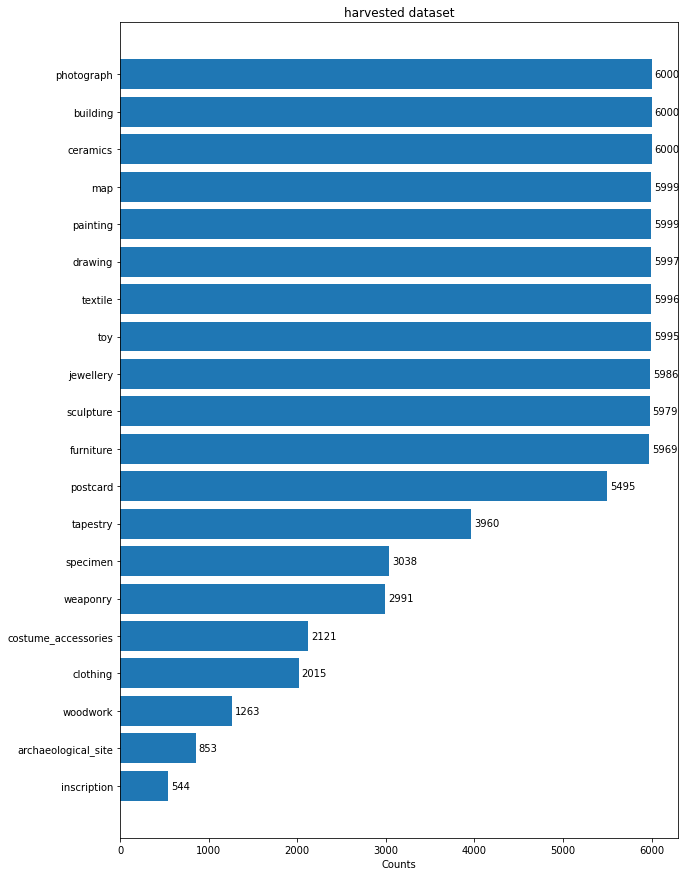

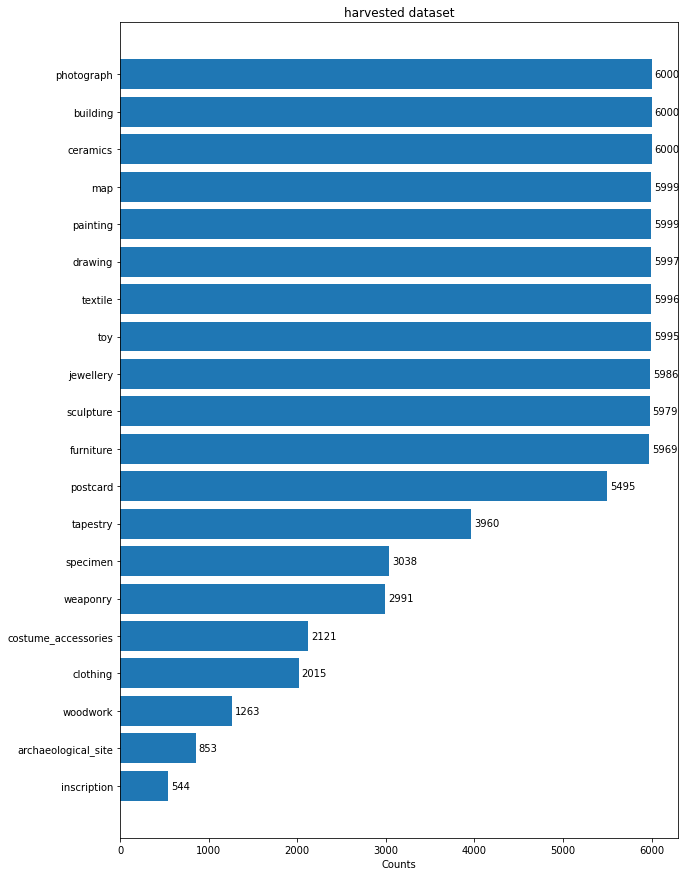

In [13]:
train_df = pd.read_csv('/home/jcejudo/projects/image_classification/data/single_label/training_data.csv')
histogram_dict = category_histogram(train_df)

plot_category_histogram(histogram_dict,log=False,title='harvested dataset')

In [18]:
sum(histogram_dict.values())

88200

In [ ]:
plot_dataset_histogram(train_df)

In [ ]:
plot_dataset_per_category(train_df)

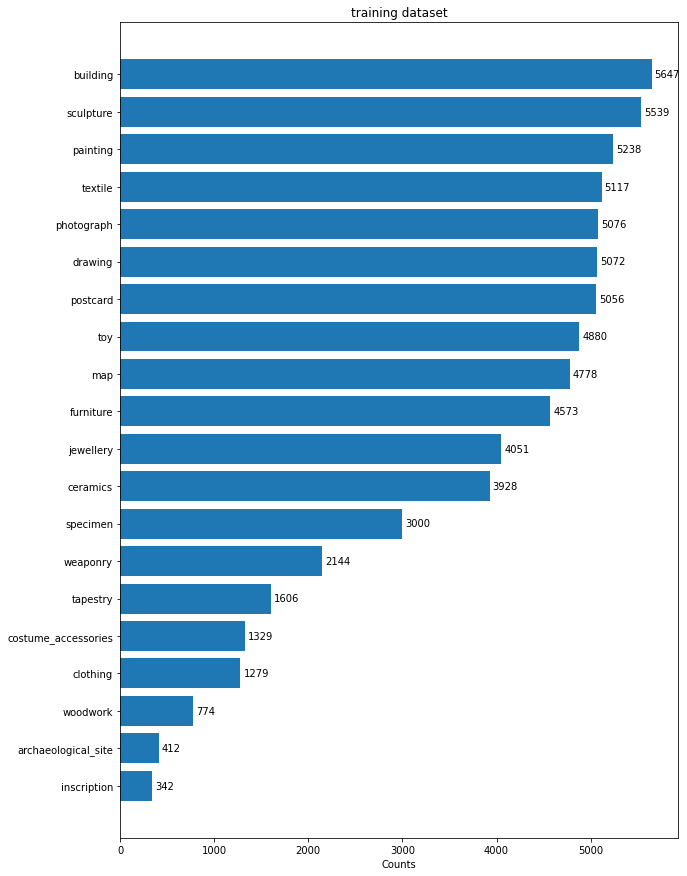

In [8]:
#analysis downloaded dataset

data_path = '/home/jcejudo/projects/image_classification/data/single_label/images_training'   

title = 'training dataset'

histogram_downloaded_dict = histogram_categories_downloaded_dataset(data_path)
fig = plot_histogram_categories_downloaded_dataset(histogram_downloaded_dict,log=False,title=title)

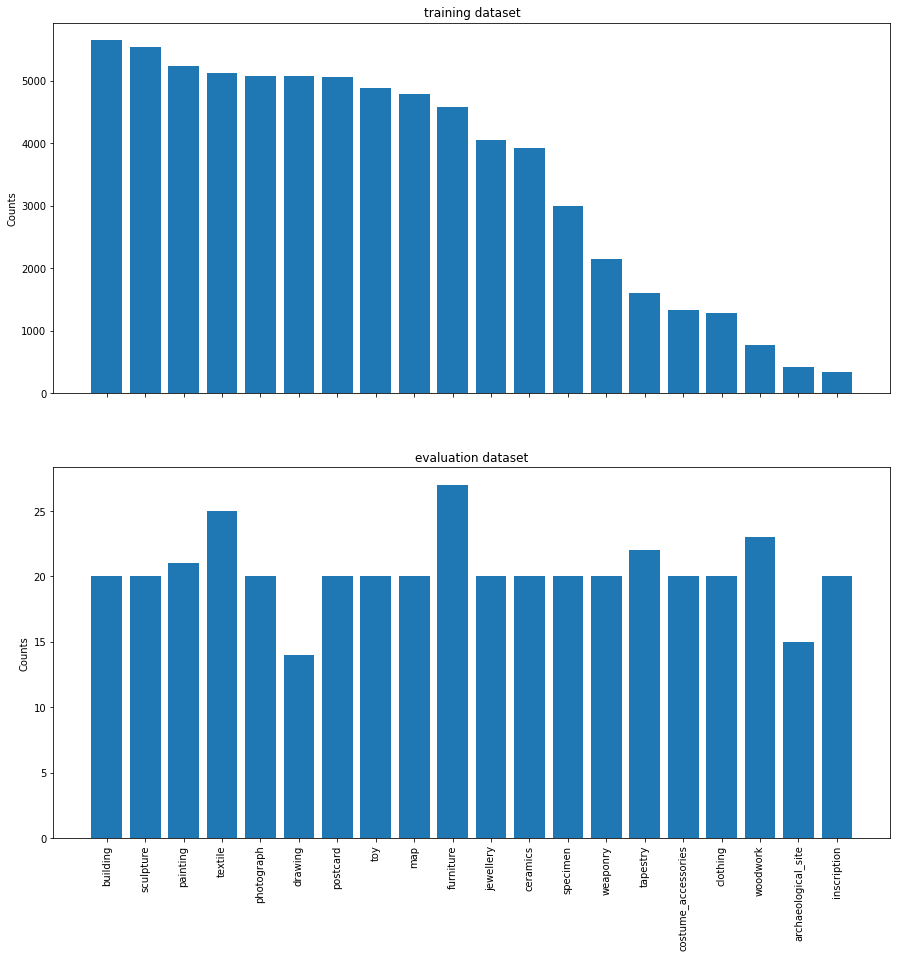

In [4]:
#horizontal

training_data_path = '/home/jcejudo/projects/image_classification/data/single_label/images_training'   

evaluation_data_path = '/home/jcejudo/projects/image_classification/data/single_label/images_evaluation'  

histogram_evaluation_dict = histogram_categories_downloaded_dataset(evaluation_data_path)
histogram_training_dict = histogram_categories_downloaded_dataset(training_data_path)

cat_list = []
count_list = []
eval_count_list = []

for k,v in histogram_training_dict.items():
    cat_list.append(k)
    count_list.append(v)
    
for k in histogram_training_dict.keys():
    if k in histogram_evaluation_dict.keys():
        eval_count_list.append(histogram_evaluation_dict[k])
    else:
        eval_count_list.append(0)
        

figsize = (15,15)
log = False

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize = figsize)

x_pos = np.arange(len(set(cat_list)))

hbars = ax1.bar(x_pos, count_list, align='center',log=log)
 
ax1.set_ylabel('Counts')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(cat_list)
ax1.set_title('training dataset')
ax1.tick_params(axis='x', rotation=90)


hbars = ax2.bar(x_pos, eval_count_list, align='center',log=log)
 
ax2.set_ylabel('Counts')

ax2.set_xticks(x_pos)
ax2.set_xticklabels(cat_list)

ax2.set_title('evaluation dataset')
ax2.tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
#compare harvested and downloaded dataset

for category,n_harvest in histogram_dict.items():
    n_download = histogram_downloaded_dict[category]
    if  n_download < n_harvest:
        print(category,n_harvest-n_download)
        
        
#get IDs from downloaded dataset and compare

data_path = Path(data_path)

ID_harvested = train_df['ID'].values

ID_list = []

for cat_path in data_path.iterdir():
    imgs_list = list(cat_path.iterdir())
    for img_path in imgs_list:
        ID = img_path.with_suffix('').name.replace('[ph]','/')
        ID_list.append(ID)
        
error_list = [ID for ID in ID_harvested if ID not in ID_list]
print(len(error_list))

## Evaluation dataset

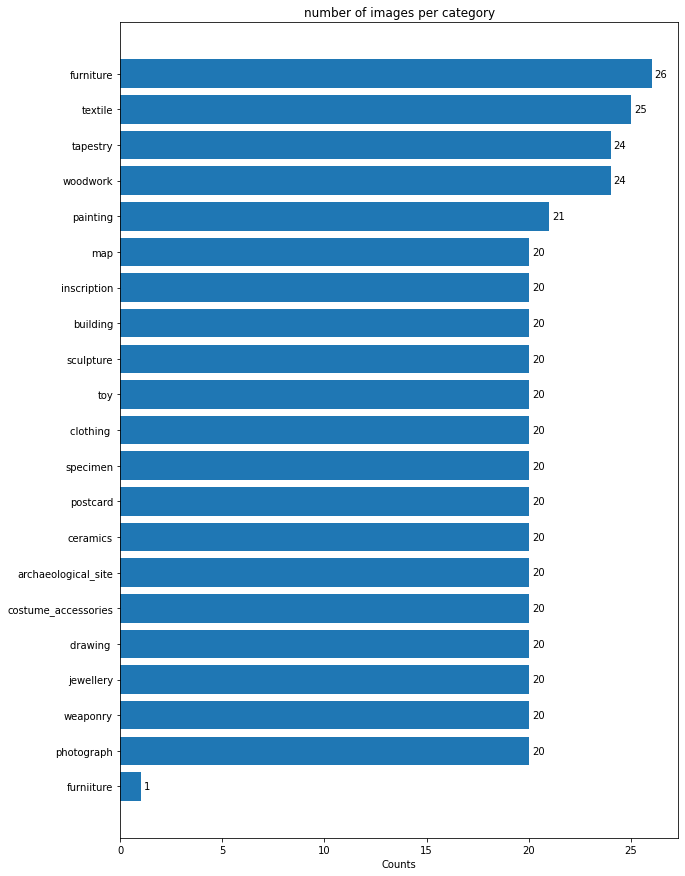

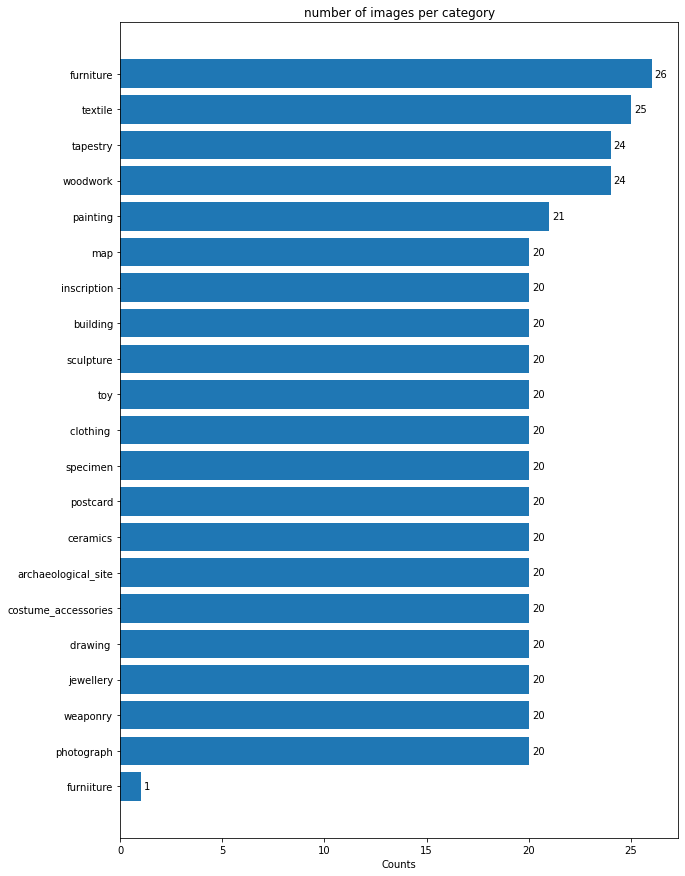

In [24]:
eval_df = pd.read_csv('/home/jcejudo/projects/image_classification/data/single_label/eval_dataset.csv')
eval_df = eval_df[['ID','URI','URL','category']]
eval_df = eval_df.dropna()

histogram_dict = category_histogram(eval_df)
plot_category_histogram(histogram_dict,log=False)

In [25]:
sum(histogram_dict.values())

421

In [ ]:
plot_dataset_histogram(eval_df)

In [ ]:
plot_dataset_per_category(eval_df)

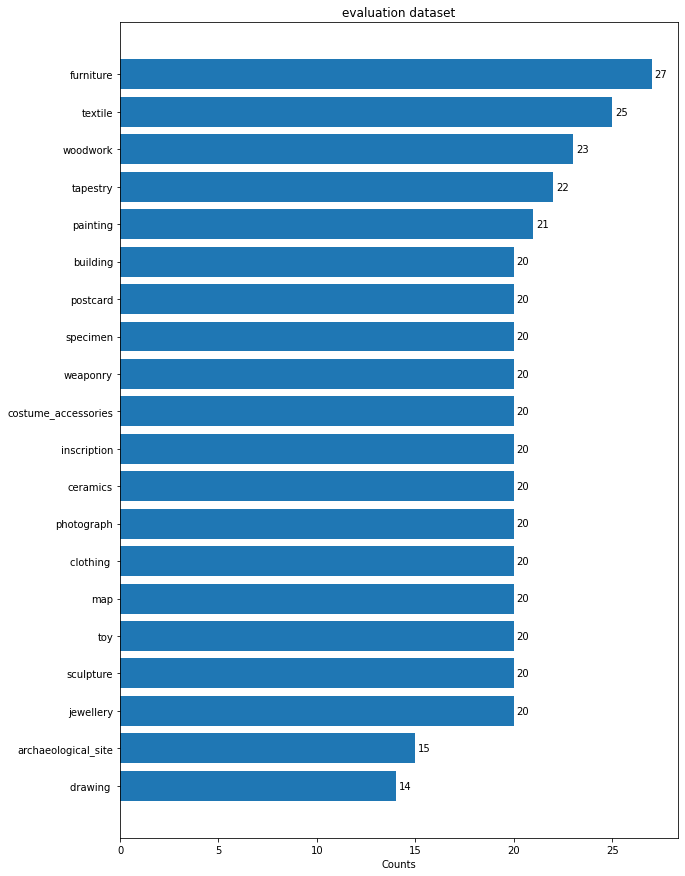

In [9]:
#analysis downloaded dataset

data_path = '/home/jcejudo/projects/image_classification/data/single_label/images_evaluation'  

title = 'evaluation dataset'


histogram_downloaded_dict = histogram_categories_downloaded_dataset(data_path)
download_count_dict = plot_histogram_categories_downloaded_dataset(histogram_downloaded_dict,log=False,title=title)

In [ ]:
#compare harvested and downloaded dataset

for category,n_harvest in histogram_dict.items():
    if category in histogram_downloaded_dict.keys():
        n_download = histogram_downloaded_dict[category]
        if  n_download < n_harvest:
            print(category,n_harvest-n_download)
    else:
        continue
        
        
#get IDs from downloaded dataset and compare

data_path = Path(data_path)

ID_harvested = eval_df['ID'].values

ID_list = []

for cat_path in data_path.iterdir():
    imgs_list = list(cat_path.iterdir())
    for img_path in imgs_list:
        ID = img_path.with_suffix('').name.replace('[ph]','/')
        ID_list.append(ID)
        
error_list = [ID for ID in ID_harvested if ID not in ID_list]

print(len(error_list))

# Multilabel

(13824, 5)
total number of datasets: 97
number of datasets after filtering 86


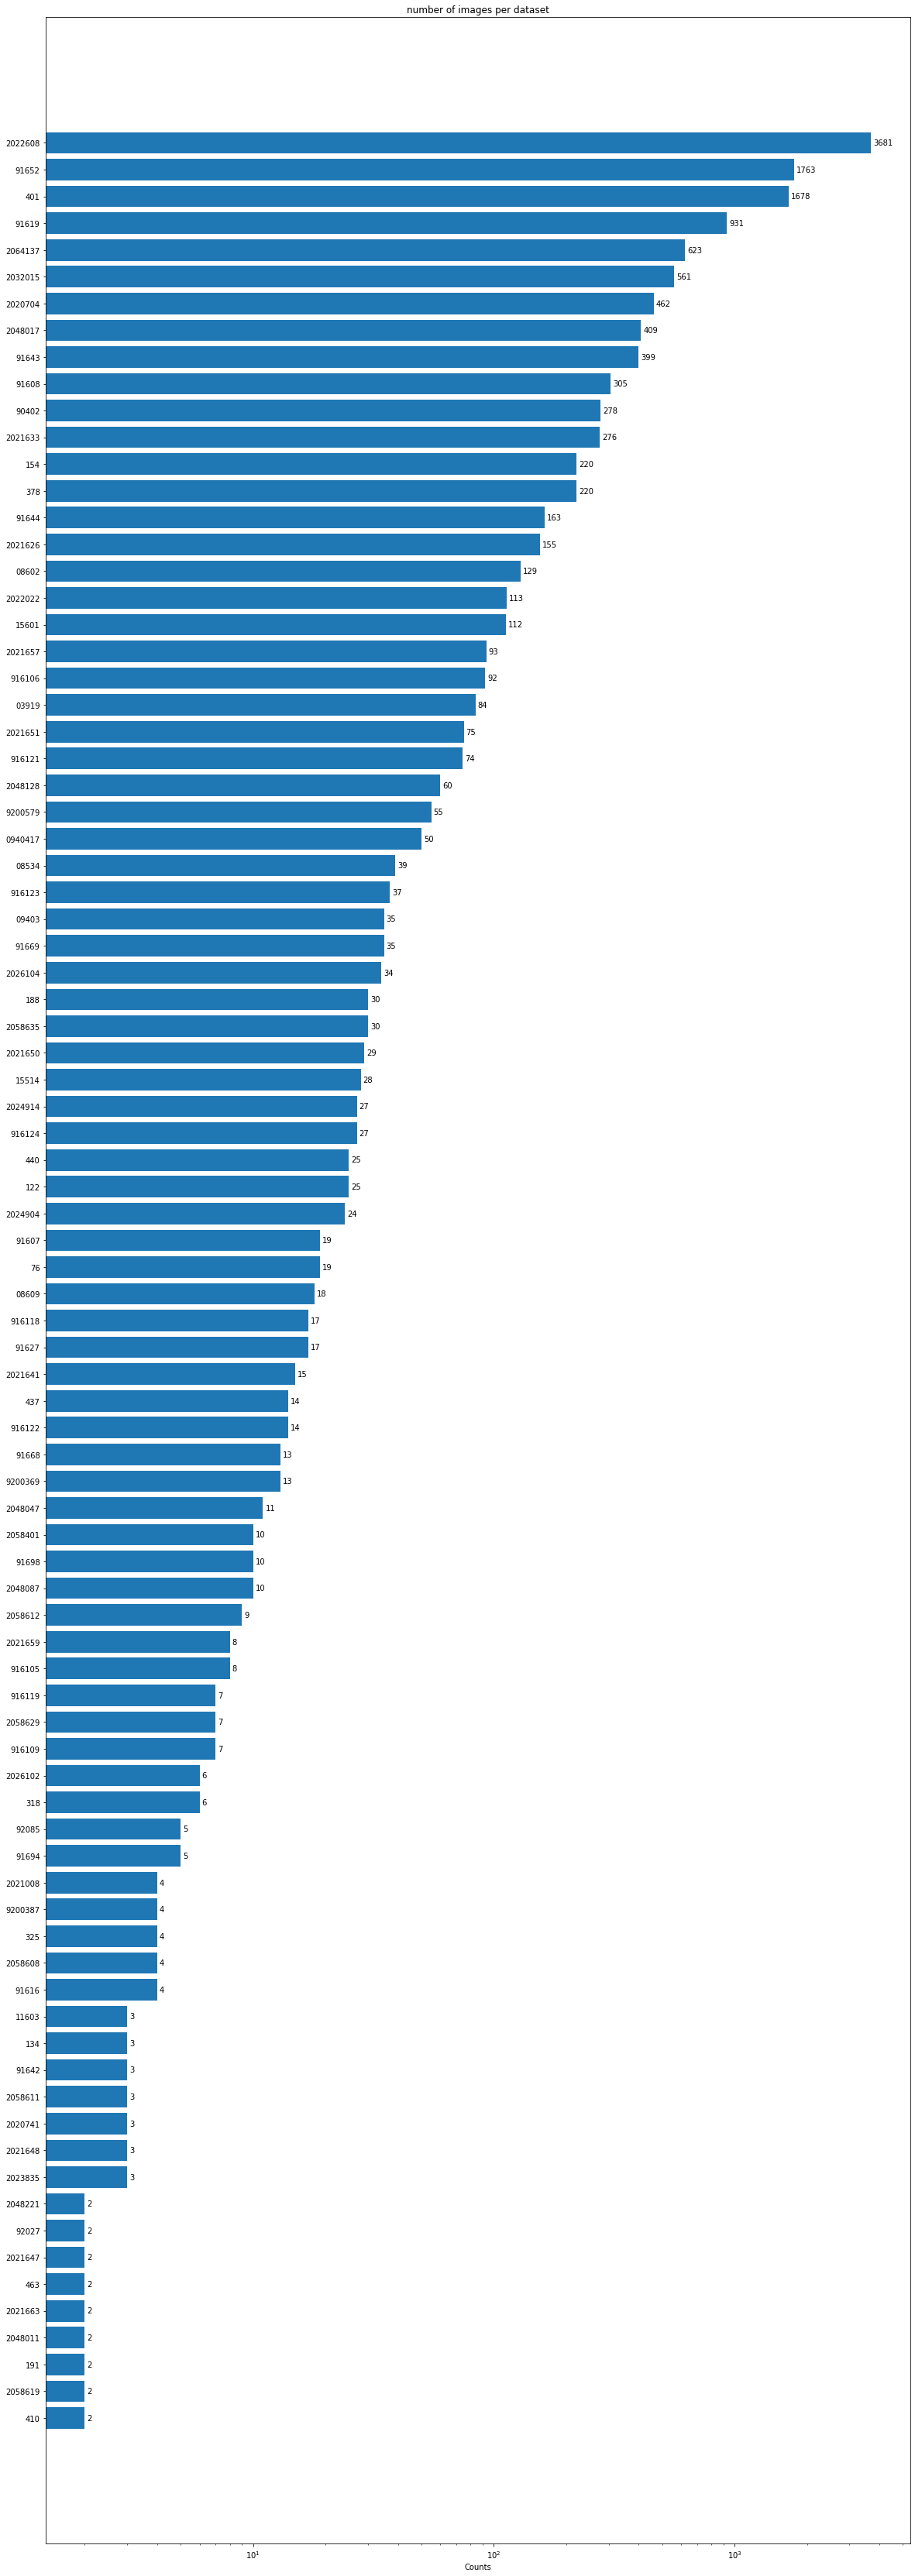

In [19]:
#downloaded dataset
data_path = '/home/jcejudo/projects/image_classification/data/multilabel/images_training'   
annotations_path = '/home/jcejudo/projects/image_classification/data/multilabel/training_dataset.csv'

multi_df = pd.read_csv(annotations_path)

#read images folder
data_path = Path(data_path)
imgs_downloaded = list(data_path.iterdir())
imgs_downloaded = [img.with_suffix('').name.replace('[ph]','/') for img in imgs_downloaded]
multi_df = multi_df.loc[multi_df['ID'].apply(lambda x: x in imgs_downloaded)]

print(multi_df.shape)

plot_dataset_histogram(multi_df)

['jewellery', 'postcard', 'toy', 'map', 'building', 'sculpture', 'textile', 'specimen', 'inscription', 'drawing', 'woodwork', 'painting', 'furniture', 'ceramics', 'clothing', 'photograph', 'tapestry']
27764


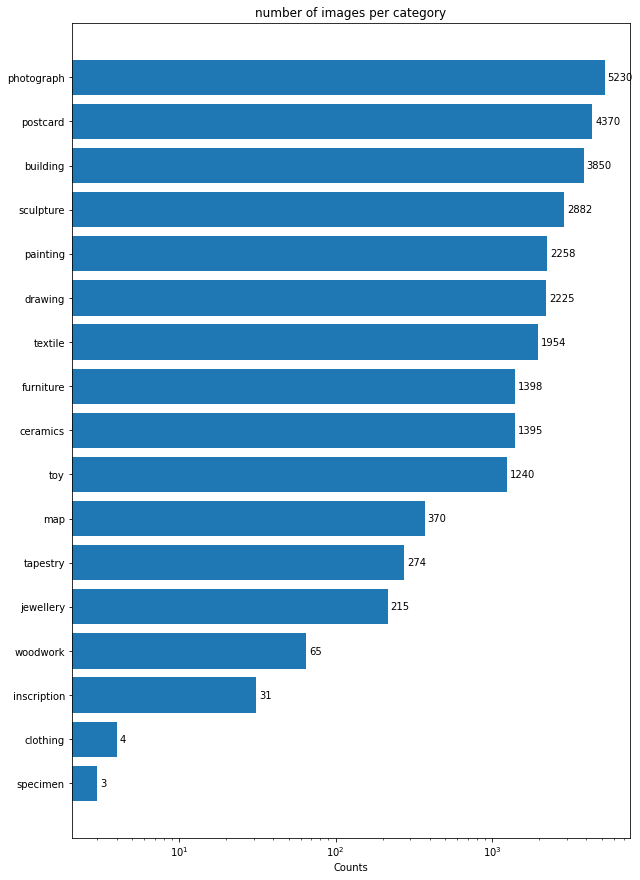

In [22]:

def histogram_category_multilabel(df):
    unique_categories = []
    for cat in df['category'].values:
        unique_categories += cat.split()

    unique_categories = list(set(unique_categories))
    
    print(unique_categories)

    occurrence_dict = {}
    for cat in unique_categories:
        occurrence_dict.update({cat:df.loc[df['category'].apply(lambda x: cat in x)].shape[0]})

    count_list = [occurrence_dict[cat] for cat in unique_categories]

    #sort in descending order
    sort_index = np.argsort(-1.0*np.array(count_list))
    ordered_count_list = [count_list[idx] for idx in sort_index]
    ordered_categories_list = [unique_categories[idx] for idx in sort_index]
    
    histogram_dict = {cat:count for cat,count in zip(ordered_categories_list,ordered_count_list)}
    
    plot_category_histogram(histogram_dict,figsize=(10,15),title = 'number of images per category')
    
    
histogram_category_multilabel(multi_df)

(162, 6)
total number of datasets: 52
number of datasets after filtering 31


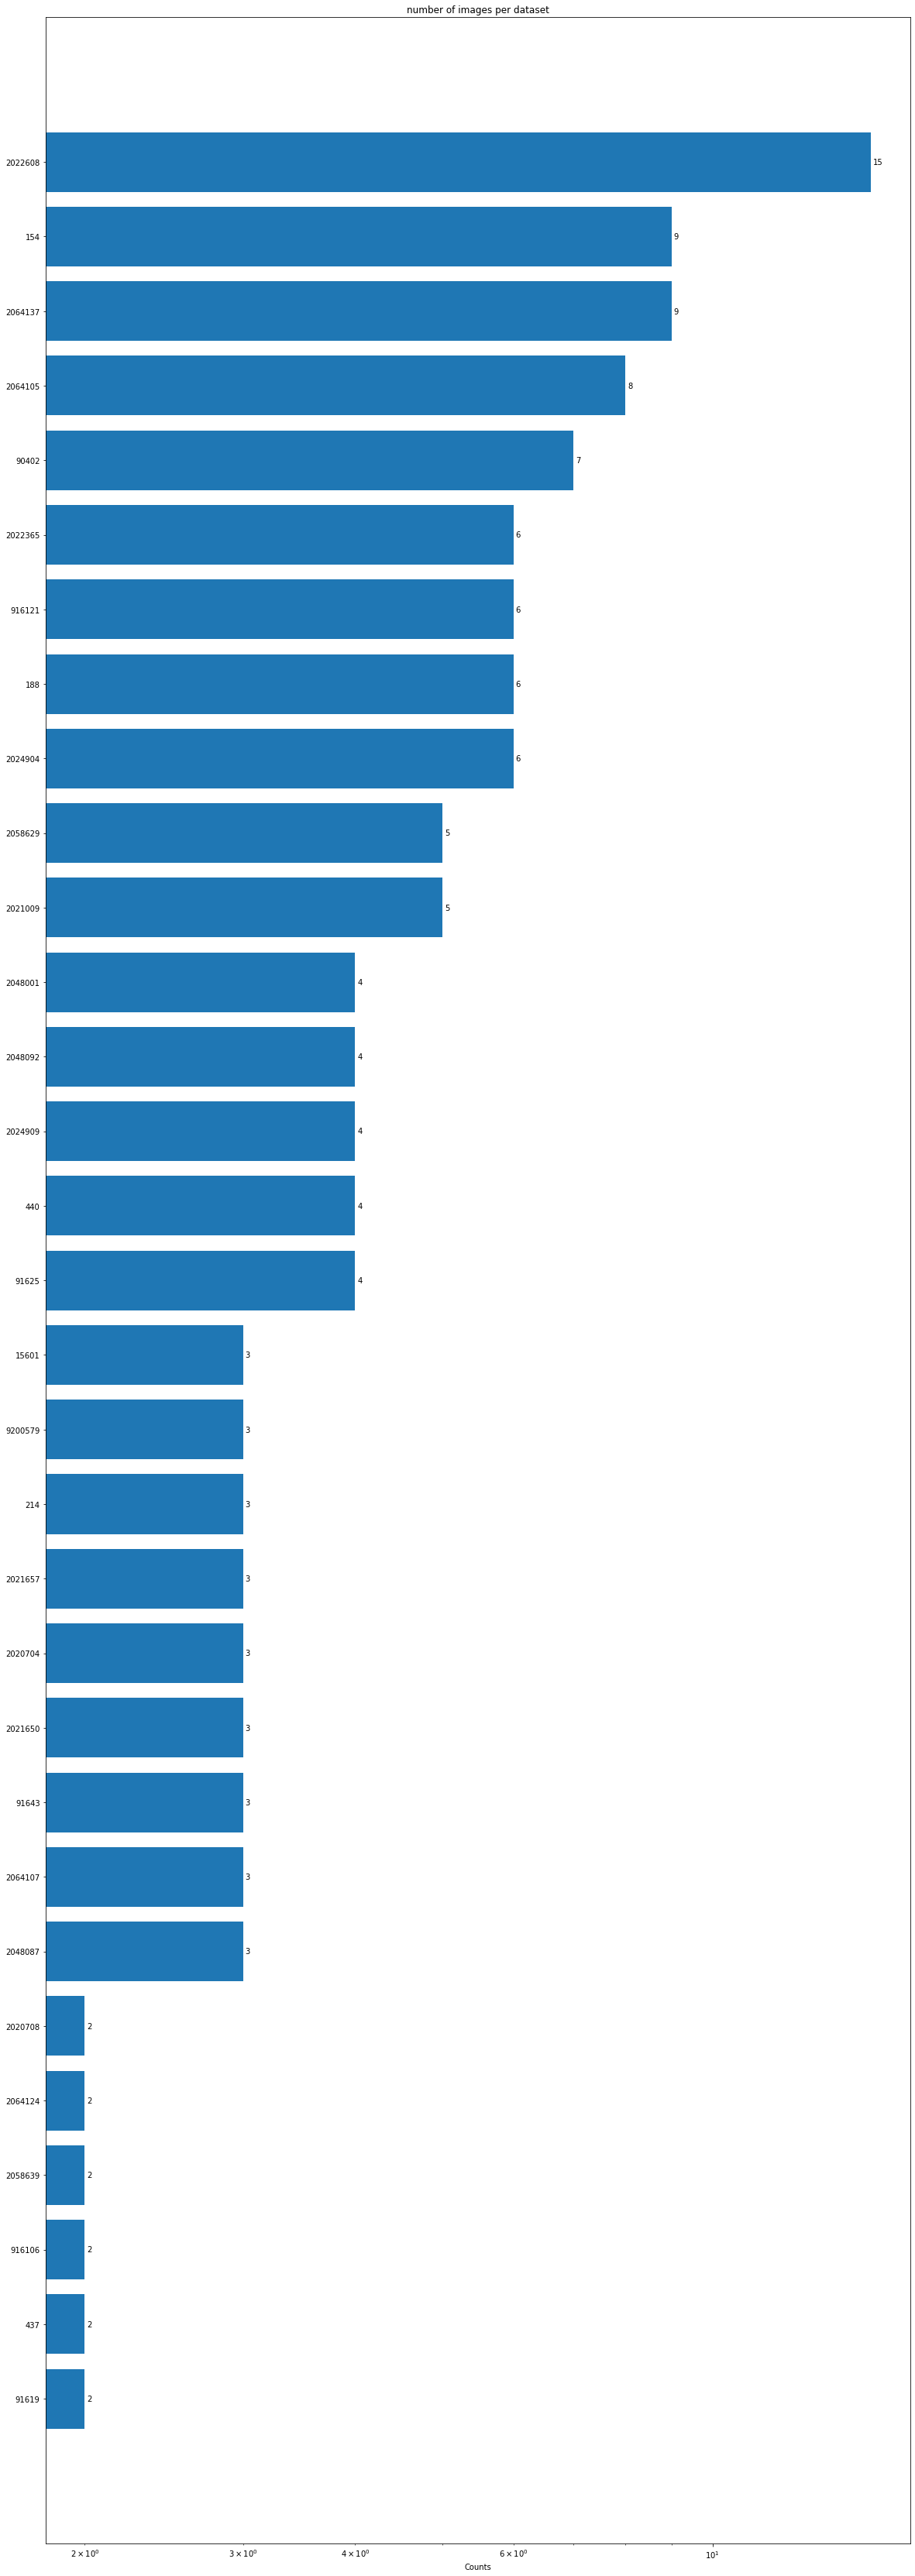

In [25]:
#evaluation set

#downloaded dataset
data_path = '/home/jcejudo/projects/image_classification/data/multilabel/images_evaluation'   
annotations_path = '/home/jcejudo/projects/image_classification/data/multilabel/eval_multilabel_with_URL.csv'

multi_df = pd.read_csv(annotations_path)

#read images folder
data_path = Path(data_path)
imgs_downloaded = list(data_path.iterdir())
imgs_downloaded = [img.with_suffix('').name.replace('[ph]','/') for img in imgs_downloaded]
multi_df = multi_df.loc[multi_df['ID'].apply(lambda x: x in imgs_downloaded)]

print(multi_df.shape)

plot_dataset_histogram(multi_df)

['inscription', 'tapestry', 'weaponry', 'jewellery', 'costume_accessories', 'clothing', 'postcard', 'painting', 'sculpture', 'map', 'photograph', 'building', 'archaeological_site', 'toy', 'specimen', 'furniture', 'woodwork', 'drawing', 'ceramics']


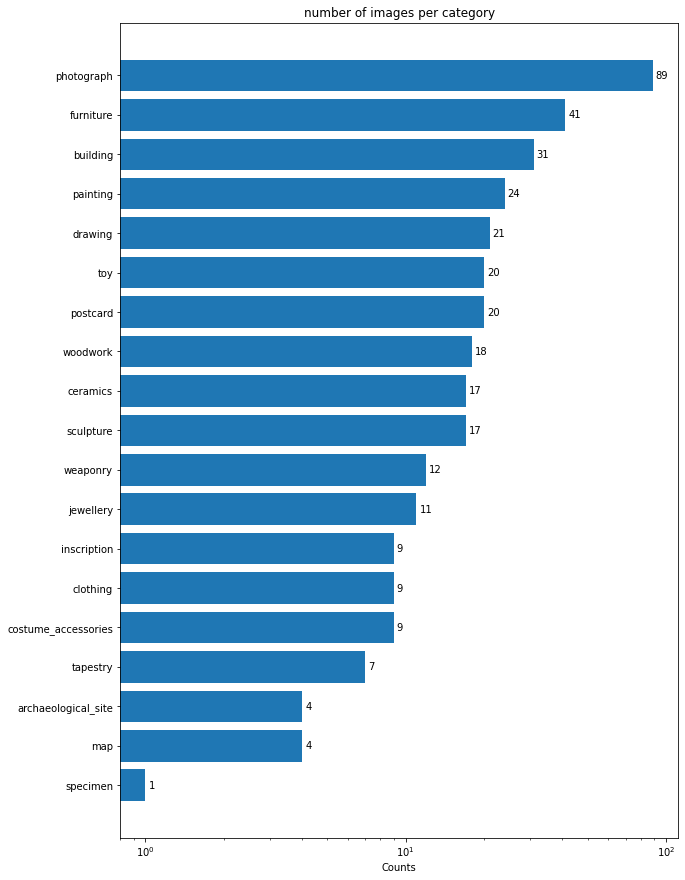

In [26]:
histogram_category_multilabel(multi_df)

['tapestry', 'toy', 'ceramics', 'clothing', 'woodwork', 'specimen', 'drawing', 'furniture', 'painting', 'map', 'postcard', 'building', 'jewellery', 'sculpture', 'inscription', 'textile', 'photograph']
162
(162, 6)


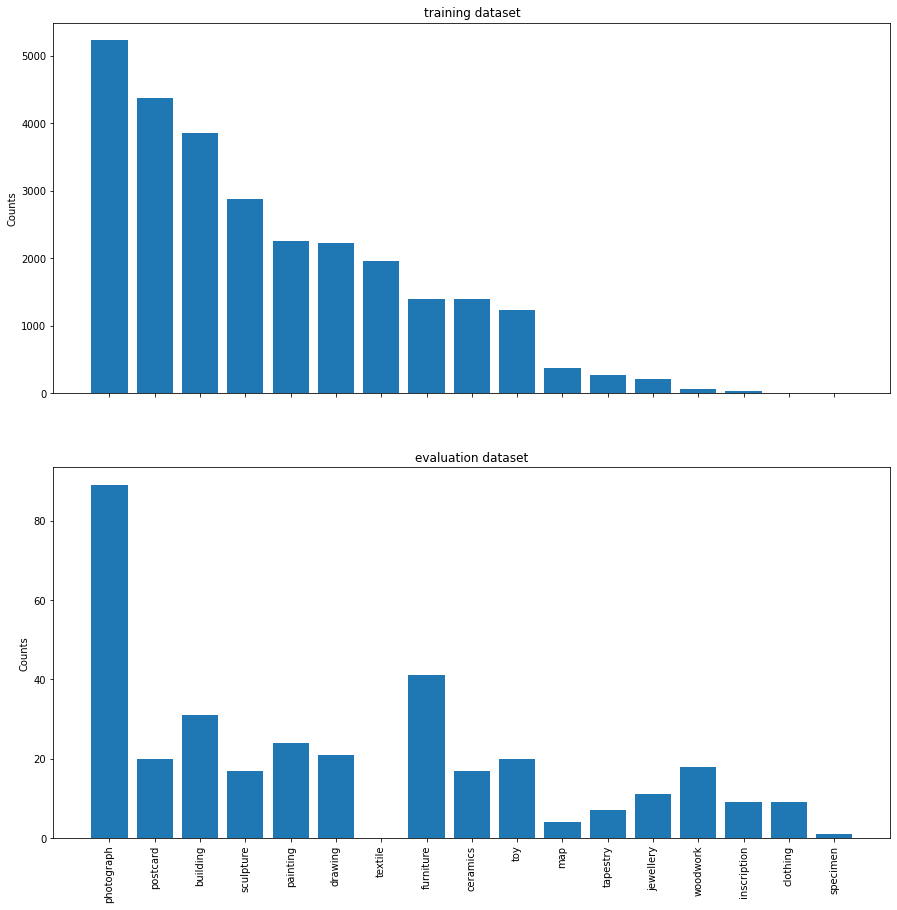

In [7]:


data_path = '/home/jcejudo/projects/image_classification/data/multilabel/images_training'   
annotations_path = '/home/jcejudo/projects/image_classification/data/multilabel/training_dataset.csv'

multi_df = pd.read_csv(annotations_path)

#read images folder
data_path = Path(data_path)
imgs_downloaded = list(data_path.iterdir())
imgs_downloaded = [img.with_suffix('').name.replace('[ph]','/') for img in imgs_downloaded]
multi_df = multi_df.loc[multi_df['ID'].apply(lambda x: x in imgs_downloaded)]

unique_categories = []
for cat in multi_df['category'].values:
    unique_categories += cat.split()

unique_categories = list(set(unique_categories))

print(unique_categories)

occurrence_dict = {}
for cat in unique_categories:
    occurrence_dict.update({cat:multi_df.loc[multi_df['category'].apply(lambda x: cat in x)].shape[0]})

count_list = [occurrence_dict[cat] for cat in unique_categories]

#sort in descending order
sort_index = np.argsort(-1.0*np.array(count_list))
ordered_training_count_list = [count_list[idx] for idx in sort_index]
ordered_categories_list = [unique_categories[idx] for idx in sort_index]


data_path = '/home/jcejudo/projects/image_classification/data/multilabel/images_evaluation'   
annotations_path = '/home/jcejudo/projects/image_classification/data/multilabel/eval_multilabel_with_URL.csv'

multi_df = pd.read_csv(annotations_path)

#read images folder
data_path = Path(data_path)
imgs_downloaded = list(data_path.iterdir())
print(len(imgs_downloaded))
imgs_downloaded = [img.with_suffix('').name.replace('[ph]','/') for img in imgs_downloaded]
multi_df = multi_df.loc[multi_df['ID'].apply(lambda x: x in imgs_downloaded)]

multi_df = multi_df.drop_duplicates(['ID'])

print(multi_df.shape)

occurrence_dict = {}
for cat in ordered_categories_list:
    occurrence_dict.update({cat:multi_df.loc[multi_df['category'].apply(lambda x: cat in x)].shape[0]})

evaluation_count_list = [occurrence_dict[cat] for cat in ordered_categories_list]



figsize = (15,15)
log = False

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize = figsize)

x_pos = np.arange(len(set(ordered_categories_list)))


hbars = ax1.bar(x_pos, ordered_training_count_list, align='center',log=log)
 
ax1.set_ylabel('Counts')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(ordered_categories_list)

ax1.set_title('training dataset')
ax1.tick_params(axis='x', rotation=90)


hbars = ax2.bar(x_pos, evaluation_count_list, align='center',log=log)
 
ax2.set_ylabel('Counts')

ax2.set_xticks(x_pos)
ax2.set_xticklabels(ordered_categories_list)

ax2.set_title('evaluation dataset')
ax2.tick_params(axis='x', rotation=90)

plt.show()

In [11]:
sum(evaluation_count_list)

339

(2776, 8)
['toy', 'specimen', 'woodwork', 'furniture', 'building', 'jewellery', 'weaponry', 'sculpture', 'inscription', 'tapestry', 'archaeological_site', 'painting', 'photograph', 'ceramics', 'clothing', 'drawing', 'map', 'postcard', 'costume_accessories', 'textile']


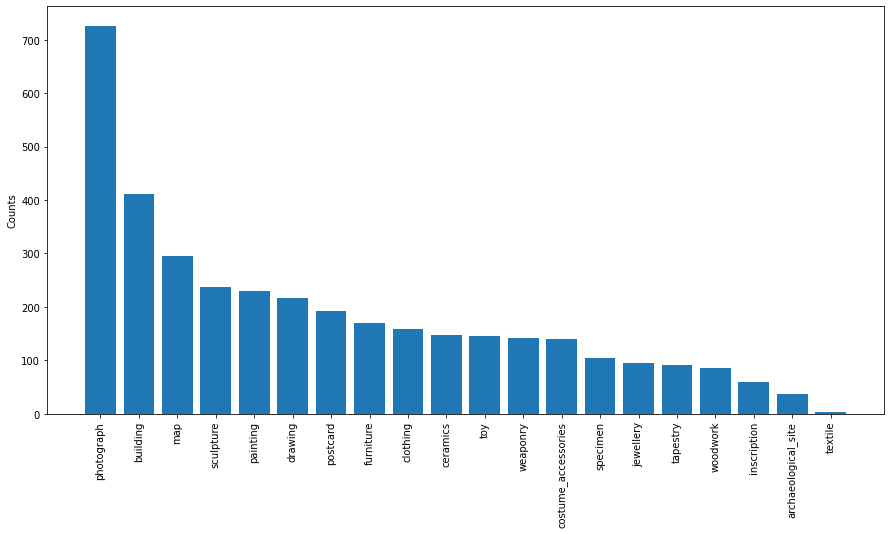

In [8]:
# to do: labelstudio



data_path = '/home/jcejudo/projects/image_classification/data/multilabel/labelstudio_images'   
annotations_path = '/home/jcejudo/rd-img-classification-pilot/labelstudio/training_data.csv'

multi_df = pd.read_csv(annotations_path)

#read images folder
data_path = Path(data_path)
imgs_downloaded = list(data_path.iterdir())
imgs_downloaded = [img.with_suffix('').name.replace('[ph]','/') for img in imgs_downloaded]
multi_df = multi_df.loc[multi_df['ID'].apply(lambda x: x in imgs_downloaded)]

print(multi_df.shape)

unique_categories = []
for cat in multi_df['category'].values:
    unique_categories += cat.split()

unique_categories = list(set(unique_categories))

print(unique_categories)

occurrence_dict = {}
for cat in unique_categories:
    occurrence_dict.update({cat:multi_df.loc[multi_df['category'].apply(lambda x: cat in x)].shape[0]})

count_list = [occurrence_dict[cat] for cat in unique_categories]

#sort in descending order
sort_index = np.argsort(-1.0*np.array(count_list))
ordered_training_count_list = [count_list[idx] for idx in sort_index]
ordered_categories_list = [unique_categories[idx] for idx in sort_index]


# data_path = '/home/jcejudo/projects/image_classification/data/multilabel/images_evaluation'   
# annotations_path = '/home/jcejudo/projects/image_classification/data/multilabel/eval_multilabel_with_URL.csv'

# multi_df = pd.read_csv(annotations_path)

# #read images folder
# data_path = Path(data_path)
# imgs_downloaded = list(data_path.iterdir())
# print(len(imgs_downloaded))
# imgs_downloaded = [img.with_suffix('').name.replace('[ph]','/') for img in imgs_downloaded]
# multi_df = multi_df.loc[multi_df['ID'].apply(lambda x: x in imgs_downloaded)]

# multi_df = multi_df.drop_duplicates(['ID'])

# print(multi_df.shape)

# occurrence_dict = {}
# for cat in unique_categories:
#     occurrence_dict.update({cat:multi_df.loc[multi_df['category'].apply(lambda x: cat in x)].shape[0]})

# evaluation_count_list = [occurrence_dict[cat] for cat in unique_categories]



figsize = (15,7.5)
log = False

fig, ax1 = plt.subplots(nrows=1, sharex=False,figsize = figsize)

x_pos = np.arange(len(set(ordered_categories_list)))


hbars = ax1.bar(x_pos, ordered_training_count_list, align='center',log=log)
 
ax1.set_ylabel('Counts')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(ordered_categories_list)

#ax1.set_title('training dataset')
ax1.tick_params(axis='x', rotation=90)


# hbars = ax2.bar(x_pos, evaluation_count_list, align='center',log=log)
 
# ax2.set_ylabel('Counts')

# ax2.set_xticks(x_pos)
# ax2.set_xticklabels(ordered_categories_list)

# ax2.set_title('evaluation dataset')
# ax2.tick_params(axis='x', rotation=45)

# plt.show()

In [ ]:
#sample small dataset

from shutil import copyfile
import numpy as np

def create_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)

n = 100
saving_dir = '/home/jcejudo/training_data_100'
create_dir(saving_dir)

data_path = '/home/jcejudo/training_data_3000_open_permission'
for cat in os.listdir(data_path):
    create_dir(os.path.join(saving_dir,cat))
    filename_list = os.listdir(os.path.join(data_path,cat))
    idx = np.random.randint(len(filename_list),size=n)
    filtered_filename_list = [filename_list[i] for i in idx]
    
    for fname in filtered_filename_list:
        src_path = os.path.join(data_path,cat,fname)
        dest_path = os.path.join(saving_dir,cat,fname)
        copyfile(src_path,dest_path)
        
        
    


In [ ]:
#open all images of dataset
from PIL import Image
data_path = '/home/jcejudo/training_data_3000_open_permission'

for cat in os.listdir(data_path):
    print(cat)
    for fname in os.listdir(os.path.join(data_path,cat)):
        Image.open(os.path.join(data_path,cat,fname))

In [ ]:
import pandas as pd

from pathlib import Path

def id_to_filename(id):
    return id.replace('/','[ph]')

data_dir = Path('/home/jcejudo/training_data_multilabel_open_permission')

df_path = Path('/home/jcejudo/rd-img-classification-pilot/data/multilabel/multilabel_dataset_open_permission.csv')
df = pd.read_csv(df_path)
#filter images in df contained in data_path
imgs_list = list(data_dir.iterdir())
# df['filepath'] = df['ID'].apply(lambda x:data_dir.joinpath(id_to_filename(x)+'.jpg'))
# df = df.loc[df['filepath'].apply(lambda x: Path(x) in imgs_list)]
df['n_labels'] = df['category'].apply(lambda x: len(x.split()))
df = df.sort_values(by='n_labels',ascending=False)
df = df.drop_duplicates(keep='first',subset='ID')
print(df.shape)